# AML-3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [26]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

In [27]:
trainingset.shape

(28709, 2311)

## Split data

In [28]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [29]:
x_training[0]

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

In [30]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


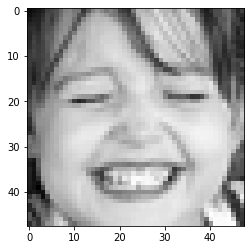

facial emotion: happy


In [92]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [168]:
# Training Dataset
training_data_happy_sad = []
training_labels_happy_sad = []

for i in range(0, len(y_training)):
    if(y_training[i][3] == 1 or y_training[i][4] == 1):
        training_labels_happy_sad.append(y_training[i])
        training_data_happy_sad.append(x_training[i])

training_data_happy_sad = np.array(training_data_happy_sad)
training_data_happy_sad = training_data_happy_sad.reshape(len(training_data_happy_sad), 48, 48)

training_labels_happy_sad = np.array(training_labels_happy_sad)
training_labels_happy_sad = training_labels_happy_sad.reshape(len(training_labels_happy_sad),7)


# Testing Dataset
testing_data_happy_sad = []
testing_labels_happy_sad = []

for i in range(0, len(y_testing)):
    if(y_testing[i][3] == 1 or y_training[i][4] == 1):
        testing_labels_happy_sad.append(y_testing[i])
        testing_data_happy_sad.append(x_testing[i])

testing_data_happy_sad = np.array(testing_data_happy_sad)
testing_data_happy_sad = testing_data_happy_sad.reshape(len(testing_data_happy_sad), 48, 48)

testing_labels_happy_sad = np.array(testing_labels_happy_sad)
testing_labels_happy_sad = testing_labels_happy_sad.reshape(len(testing_labels_happy_sad),7)

In [171]:
print(training_data_happy_sad.shape)
print(training_labels_happy_sad.shape)
print(testing_data_happy_sad.shape)
print(testing_labels_happy_sad.shape)

(12045, 48, 48)
(12045, 7)
(1323, 48, 48)
(1323, 7)


[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

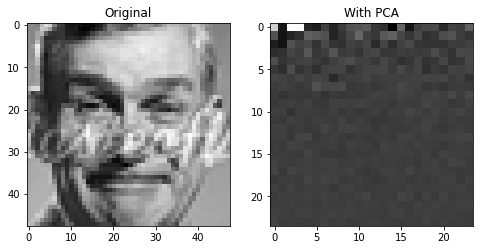

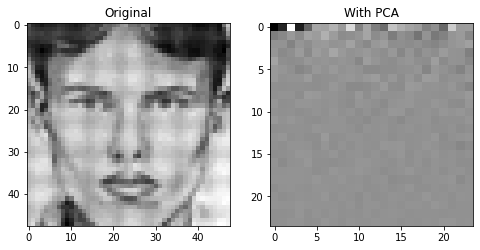

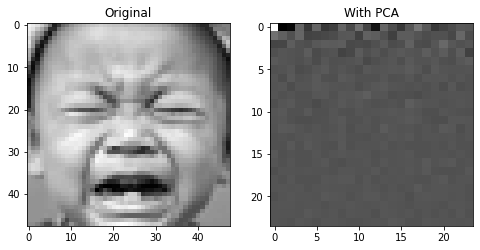

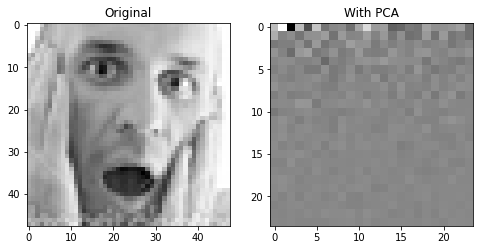

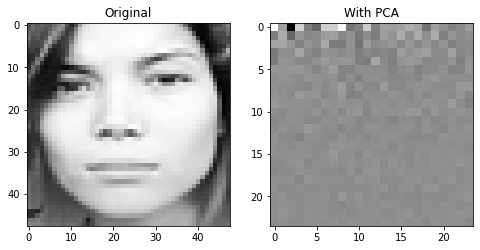

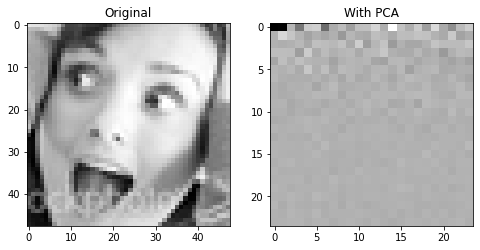

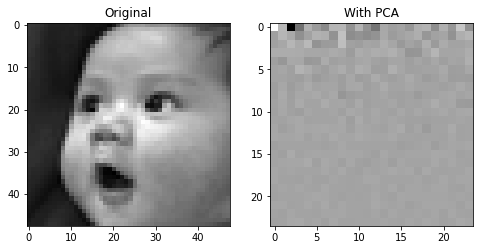

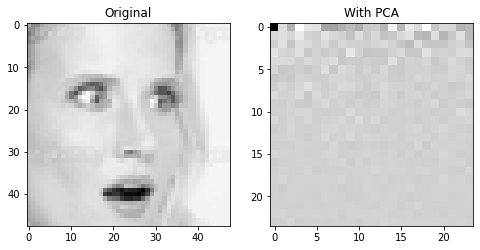

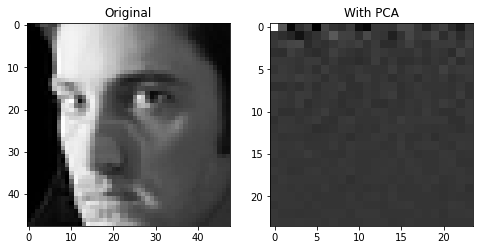

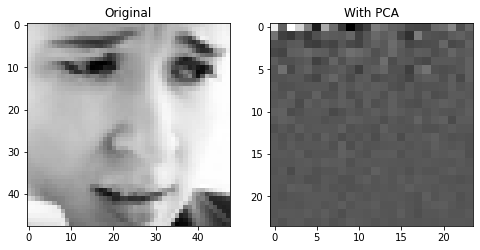

In [195]:
# PCA

# Traing dataset

training_data_happy_sad = training_data_happy_sad.reshape(len(training_data_happy_sad),2304)

from sklearn.decomposition import PCA
pca = PCA(n_components=576)
pca.fit(training_data_happy_sad)
X_train_pca = pca.transform(training_data_happy_sad)

X_train_pca_to_show_image = X_train_pca.reshape(len(X_train_pca),24,24)

for i in range(0, 10):
    sampleindex = np.random.randint(0, 1000)

    sample_without_pca = x_training[sampleindex, :]
    sample_with_pca = X_train_pca_to_show_image[sampleindex, :]

    sample_without_pca = sample_without_pca.reshape(48, 48)
    sample_with_pca = sample_with_pca.reshape(24, 24)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ax1.imshow(sample_without_pca, cmap='gray')
    ax1.set_title('Original')

    ax2.imshow(sample_with_pca, cmap='gray')
    ax2.set_title('With PCA')

    plt.show()

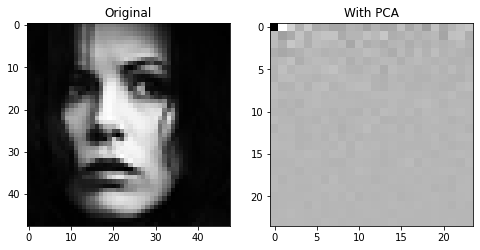

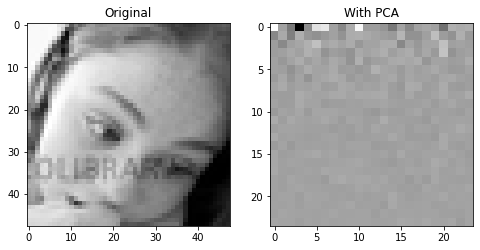

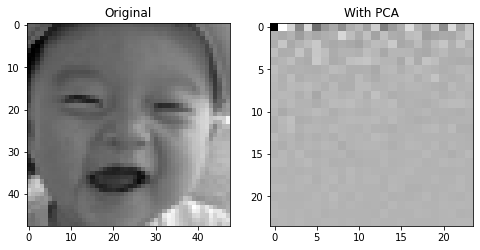

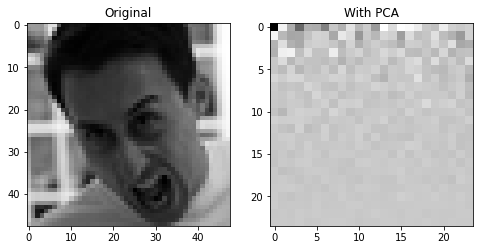

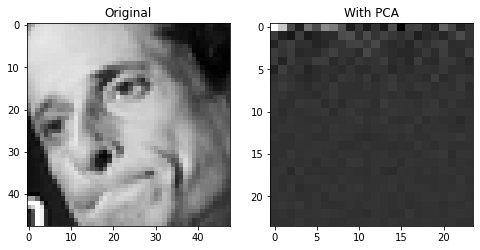

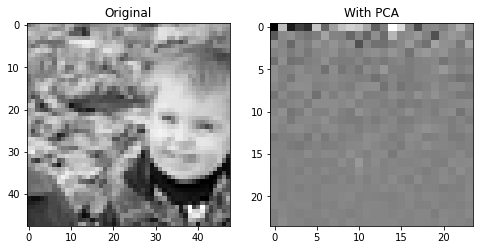

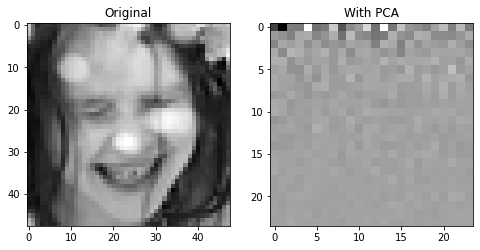

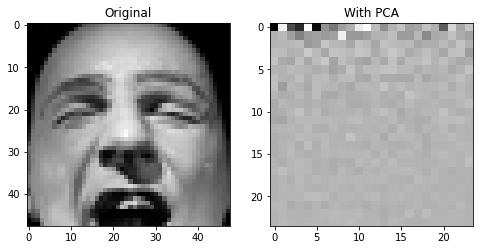

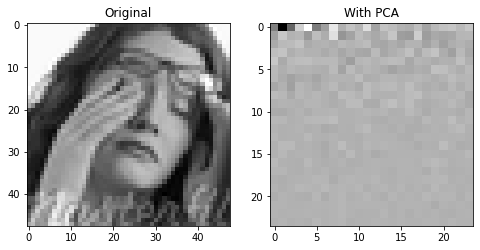

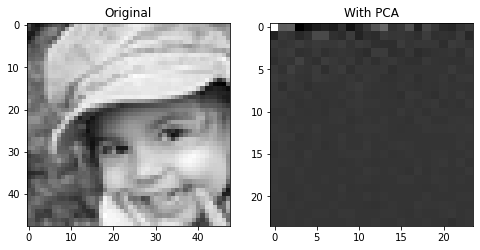

In [194]:
# PCA

# Testing dataset

testing_data_happy_sad = testing_data_happy_sad.reshape(len(testing_data_happy_sad),2304)

from sklearn.decomposition import PCA
pca = PCA(n_components=576)
pca.fit(testing_data_happy_sad)
X_test_pca = pca.transform(testing_data_happy_sad)

X_test_pca_to_show_image = X_test_pca.reshape(len(X_test_pca),24,24)

for i in range(0, 10):
    sampleindex = np.random.randint(0, 1000)

    sample_without_pca = x_testing[sampleindex, :]
    sample_with_pca = X_test_pca_to_show_image[sampleindex, :]

    sample_without_pca = sample_without_pca.reshape(48, 48)
    sample_with_pca = sample_with_pca.reshape(24, 24)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ax1.imshow(sample_without_pca, cmap='gray')
    ax1.set_title('Original')

    ax2.imshow(sample_with_pca, cmap='gray')
    ax2.set_title('With PCA')

    plt.show()

In [179]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Reshape the data
training_data_happy_sad = training_data_happy_sad.reshape(len(training_data_happy_sad), 48*48)
y = np.argmax(training_labels_happy_sad, axis=1)

# Instantiate and fit the LDA model
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(training_data_happy_sad, y)

# Transform the data using the LDA model
X_train_lda = lda.transform(training_data_happy_sad)
X_train_lda.shape



KeyboardInterrupt: 

In [ ]:
# Display a sample of images with and without LDA
for i in range(0, 10):
    sampleindex = np.random.randint(0, 1000)

    sample_without_lda = training_data_happy_sad[sampleindex, :]
    sample_with_lda = X_train_lda[sampleindex]

    # sample_without_lda = sample_without_lda.reshape(-1,48, 48)
    sample_with_lda = sample_with_lda.reshape(len(sample_with_lda),48, 48)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # ax1.imshow(sample_without_lda, cmap='gray')
    # ax1.set_title('Original')

    ax2.imshow(sample_with_lda, cmap='gray')
    ax2.set_title('With LDA')

    plt.show()

ValueError: cannot reshape array of size 1 into shape (1,48,48)

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [202]:
print(X_train_pca.shape)
print(training_labels_happy_sad.shape)

(12045, 576)
(12045, 7)


In [204]:
# Transforming shape of labels for training.

y_train = np.argmax(training_labels_happy_sad, axis=1)
print(y_train.shape)
y_test = np.argmax(testing_labels_happy_sad, axis=1)
print(y_test.shape)

(12045,)
(1323,)


In [213]:
# Train Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_pca, y_train)

# Evaluate classifier on test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes Accuracy: {:.2f}%'.format(accuracy*100))

Naive Bayes Accuracy: 46.26%


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [214]:
# logistic regression algorithm did not converge, and it recommends increasing the number of iterations or scaling the data

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

accuracy = lr.score(X_test_scaled, y_test)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.47543461829176115


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [215]:
# YOUR CODE HERE

# Train the SVM model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, gamma='scale')
svm.fit(X_train_pca, y_train)

# Test the SVM model
y_pred = svm.predict(X_test_pca)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

YOUR ANSWER HERE

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [38]:
# YOUR CODE HERE

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [39]:
# YOUR CODE HERE

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [40]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [41]:
# YOUR CODE HERE

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [42]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [43]:
# YOUR CODE HERE

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [44]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [45]:
# YOUR CODE HERE

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [46]:
# YOUR CODE HERE